# CNN Layers Visualization for skin cancer detection

In [ ]:
%matplotlib inline
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

In [54]:
imgb = io.imread('../data_scaled_test/benign/bimg-1049.png')
imgm = io.imread('../data_scaled_test/malign/mimg-178.png')
imgb = io.imread('../data_scaled_test/benign/bimg-721.png')
imgm = io.imread('../data_scaled_test/malign/mimg-57.png')



## Sample Images. Benign mole and Malign mole.

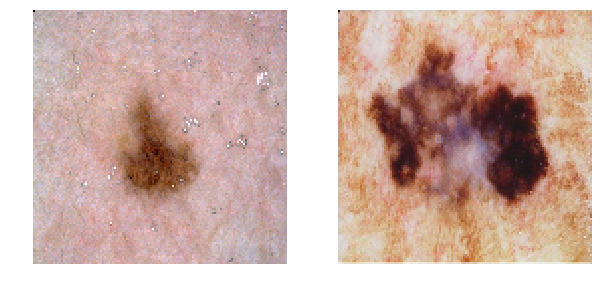

In [55]:
plt.figure(figsize=(10,20))
plt.subplot(121)
plt.imshow(imgb)
plt.axis('off')
plt.subplot(122)
plt.imshow(imgm)
plt.axis('off');

In [56]:
from keras.models import load_model

In [57]:
model = load_model('../models-backup/BM_VA_VGG_FULL_DA.hdf5')

In [94]:
from keras import backend as K

def activ_viewer(model, layer_name, im_put):
    layer_dict = dict([(layer.name, layer) for layer in model.layers])
    layer = layer_dict[layer_name]
    activ1 = K.function([model.layers[0].input, K.learning_phase()], [layer.output,])
    activations = activ1((im_put, False))
    return activations

def normalize(x):
    # utility function to normalize a tensor by its L2 norm
    return x / (K.sqrt(K.mean(K.square(x))) + 1e-5)

def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    if K.image_data_format() == 'channels_first':
        x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def plot_filters(filters):
    newimage = np.zeros((16*filters.shape[0],8*filters.shape[1]))
    for i in range(filters.shape[2]):
        y = i%8
        x = i//8
        newimage[x*filters.shape[0]:x*filters.shape[0]+filters.shape[0],
                 y*filters.shape[1]:y*filters.shape[1]+filters.shape[1]] = filters[:,:,i]
    plt.figure(figsize = (10,20))
    plt.imshow(newimage)
    plt.axis('off')

In [59]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

## Model Summary

In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0         
__________

### Block2_Conv1 Output

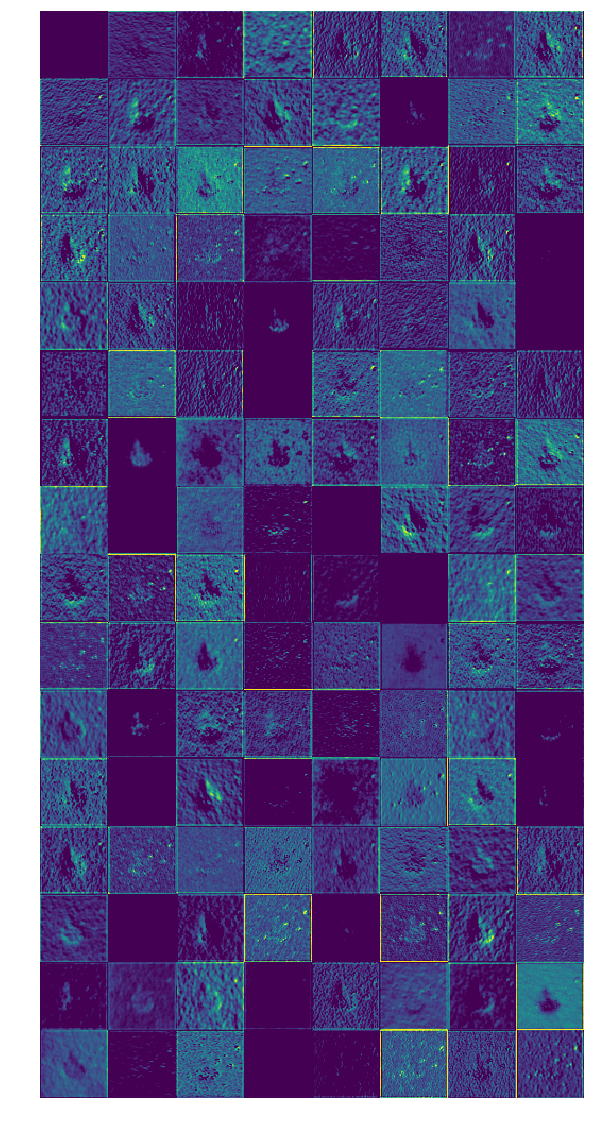

In [102]:
activ_benign = activ_viewer(model,'block2_conv1',imgb.reshape(1,128,128,3))
img_benign = deprocess_image(activ_benign[0])
plot_filters(img_benign[0])
# plt.figure(figsize=(20,20))
# for f in range(128):
#     plt.subplot(8,16,f+1)
#     plt.imshow(img_benign[0,:,:,f])
#     plt.axis('off')

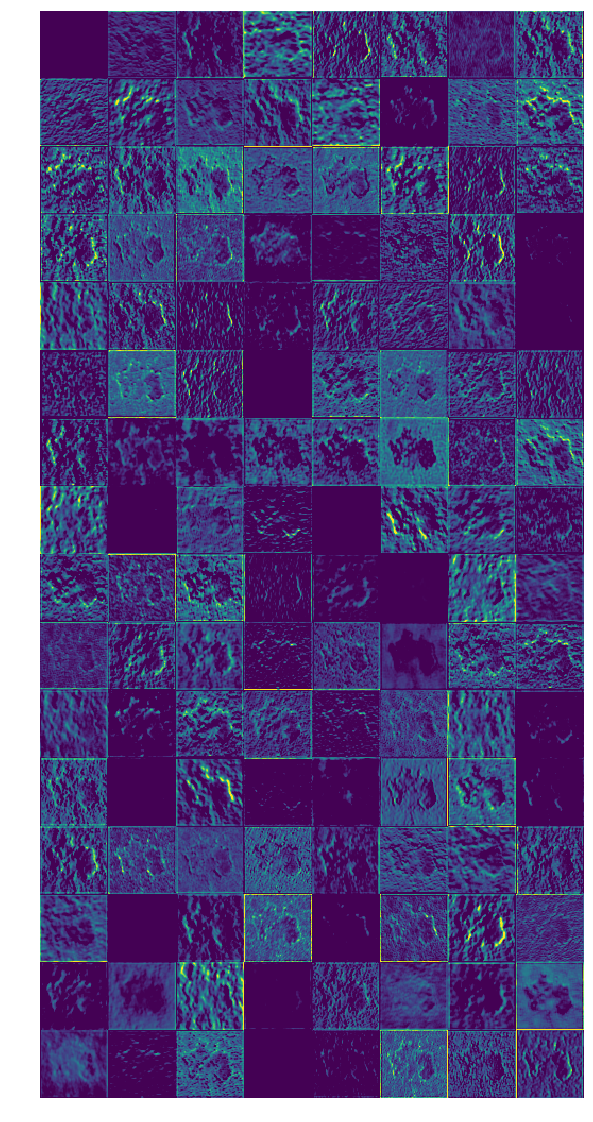

In [103]:
activ_malign = activ_viewer(model,'block2_conv1',imgm.reshape(1,128,128,3))
img_malign = deprocess_image(activ_malign[0])
plot_filters(img_malign[0])
# plt.figure(figsize=(20,20))
# for f in range(128):
#     plt.subplot(8,16,f+1)
#     plt.imshow(img_malign[0,:,:,f])
#     plt.axis('off')

#### Zoom to some of the filters

(-0.5, 63.5, 63.5, -0.5)

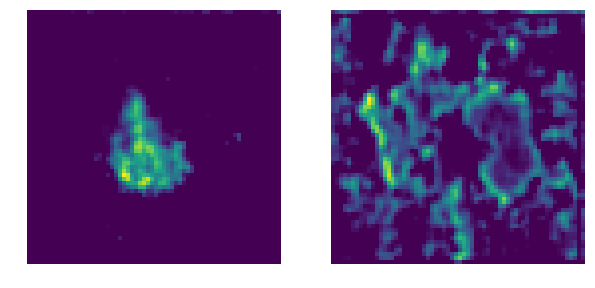

In [104]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img_benign[0,:,:,49])
plt.axis('off')
plt.subplot(122)
plt.imshow(img_malign[0,:,:,49])
plt.axis('off')



(-0.5, 63.5, 63.5, -0.5)

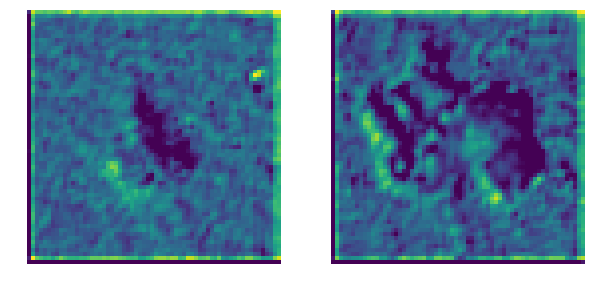

In [105]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img_benign[0,:,:,94])
plt.axis('off')
plt.subplot(122)
plt.imshow(img_malign[0,:,:,94])
plt.axis('off')


### Block3_Conv3 Output

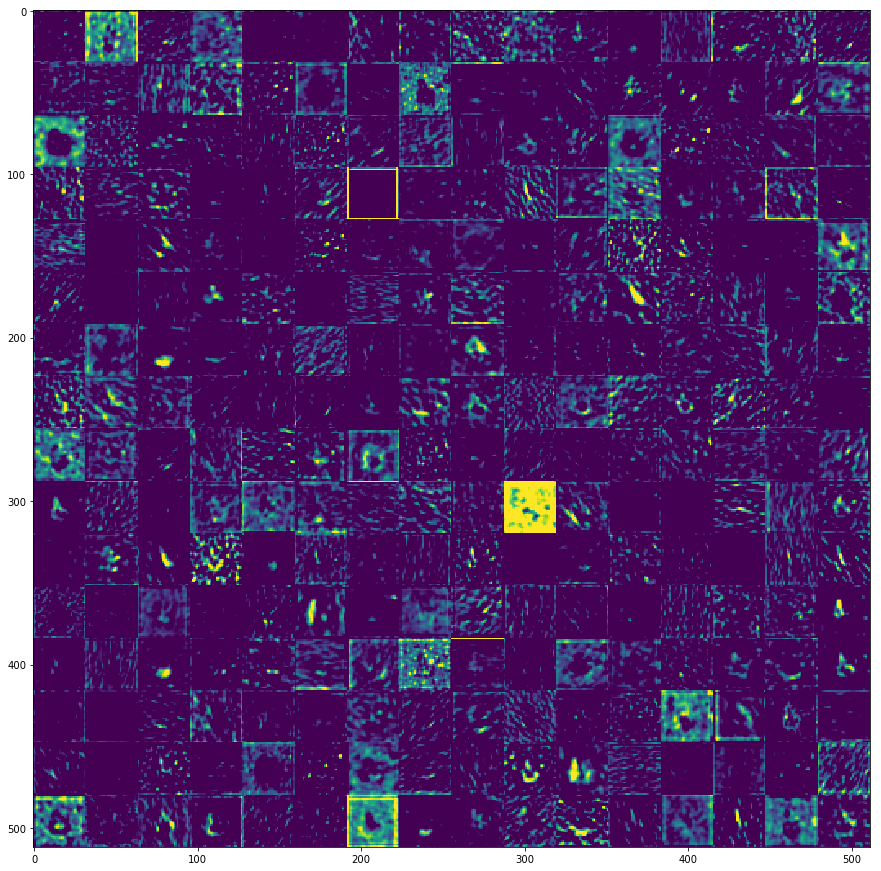

In [106]:
def plot_filters32(filters):
    newimage = np.zeros((16*filters.shape[0],16*filters.shape[1]))
    for i in range(filters.shape[2]):
        y = i%16
        x = i//16
        newimage[x*filters.shape[0]:x*filters.shape[0]+filters.shape[0],
                 y*filters.shape[1]:y*filters.shape[1]+filters.shape[1]] = filters[:,:,i]
    plt.figure(figsize = (15,25))
    plt.imshow(newimage)    
    
activ_benign = activ_viewer(model,'block3_conv3',imgb.reshape(1,128,128,3))
img_benign = deprocess_image(activ_benign[0])
plot_filters32(img_benign[0])


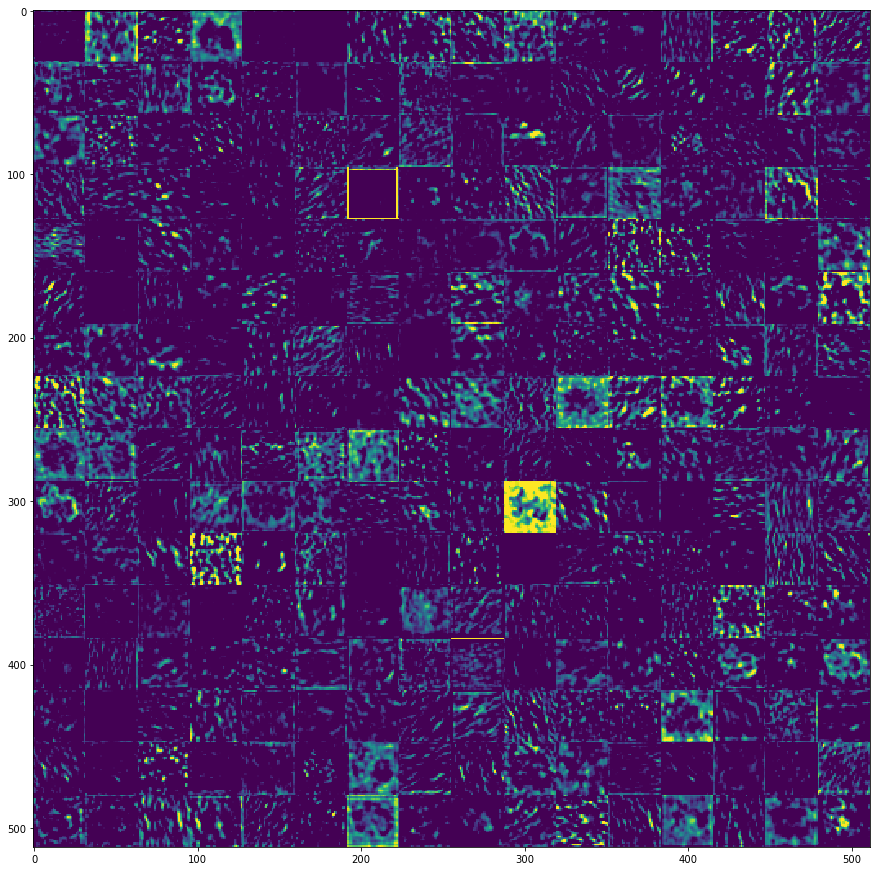

In [107]:
activ_malign = activ_viewer(model,'block3_conv3',imgm.reshape(1,128,128,3))
img_malign = deprocess_image(activ_malign[0])
plot_filters32(img_malign[0])